In [2]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision

In [3]:
mnist_train = torchvision.datasets.MNIST(root = '.', train = True, download=True)
mnist_valid = torchvision.datasets.MNIST(root = '.', train = False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 153818902.82it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 44981690.99it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 38749048.33it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14421293.54it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [4]:
mnist_train.data.shape

torch.Size([60000, 28, 28])

In [25]:
x_train =mnist_train.data / 255
y_train = mnist_train.targets

x_valid = mnist_valid.data / 255
y_valid = mnist_valid.targets

In [26]:
x_train[0].shape

torch.Size([28, 28])

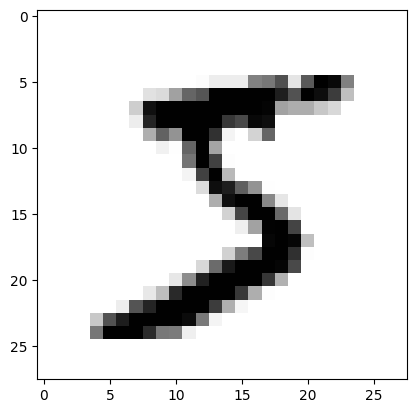

In [27]:
plt.imshow(x_train[0], cmap = 'binary')

In [28]:
y_train_5 = (y_train == 5).float().reshape(-1,1) # 이진분류로 하기 위해 데이터 변환
y_valid_5 = (y_valid == 5).float().reshape(-1,1)

In [29]:
y_train_5.shape

torch.Size([60000, 1])

In [36]:
dataset_train = list(zip(x_train, y_train_5))
dataset_valid = list(zip(x_valid, y_valid_5))

loader_train = torch.utils.data.DataLoader(dataset_train, batch_size = 32, shuffle = True, drop_last = True, num_workers = 2)
loader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size = 32, num_workers = 2) #평가는 shuffle = True, drop = True 쓰면안됨

for x, y in loader_train:
  break

#x.shape, y.shape, x.dtype, y.dtype (torch.Size([32, 28, 28]), torch.Size([32, 1]), torch.float32, torch.float32)


(torch.Size([32, 28, 28]), torch.Size([32, 1]), torch.float32, torch.float32)

In [30]:

flatten = nn.Flatten()
lin1 = nn.Linear(784, 128)
relu1 = nn.ReLU()
lin2 = nn.Linear(128, 64)
relu2 = nn.ReLU()
lin3 = nn.Linear(64, 1)
sigmoid = nn.Sigmoid()
  # z = flatten(x_train.float())
  # z = lin1(z)
  # z = relu1(z)
  # z= lin2(z)
  # z = relu2(z)
  # z = lin3(z)
  # z.shape

model = nn.Sequential(
    flatten, lin1, relu1, lin2, relu2, lin3, sigmoid
)

model(x_train.float())  # 연속형 변수로 변경해야 확률값을 구하기 좋음

opt = torch.optim.Adam(model.parameters())

In [37]:
import torchsummary
torchsummary.summary(model, (28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
              ReLU-3                  [-1, 128]               0
            Linear-4                   [-1, 64]           8,256
              ReLU-5                   [-1, 64]               0
            Linear-6                    [-1, 1]              65
           Sigmoid-7                    [-1, 1]               0
Total params: 108,801
Trainable params: 108,801
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.42
Estimated Total Size (MB): 0.43
----------------------------------------------------------------


In [32]:
loss_fn = nn.BCELoss()
prob = model(x)
loss_fn(prob, y) # 타겟 변수의 shape을 맞추어줘야됨


tensor(0.6481, grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
for epoch in range(100):
    #train......................
    step = 1
    loss_list = []
    for x, y in loader_train:
        # 1. feed-forward
        prob = model(x)
        # 2. loss
        loss = loss_fn(prob, y)
        # 3. grad
        opt.zero_grad()
        loss.backward()
        # 4. update
        opt.step()
        step += 1

        loss_list.append(loss.item())
        print(f'\r epoch={epoch}  step={step}  loss={np.mean(loss_list)}', end='')
    print()

    #valid........................
    step = 1
    loss_list = []
    for x, y in loader_valid:
        # 1. feed-forward
        with torch.no_grad():
            prob = model(x)
        # 2. loss
        loss = loss_fn(prob, y)

        step += 1

        loss_list.append(loss.item())
        print(f'\r epoch={epoch}  step={step}  loss={np.mean(loss_list)}', end='')
    print()